<b>1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Simple Linear Regression\delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


EDA

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


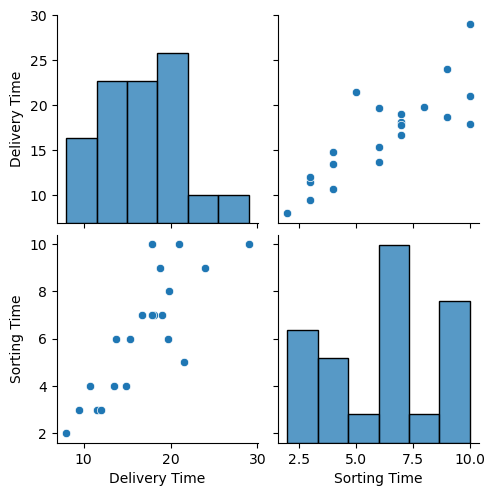

In [8]:
sns.pairplot(data)

C:\Users\CSC\AppData\Local\Temp\ipykernel_15164\916650770.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['Sorting Time'],y=data['Delivery Time'],data=data,palette='set3')


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

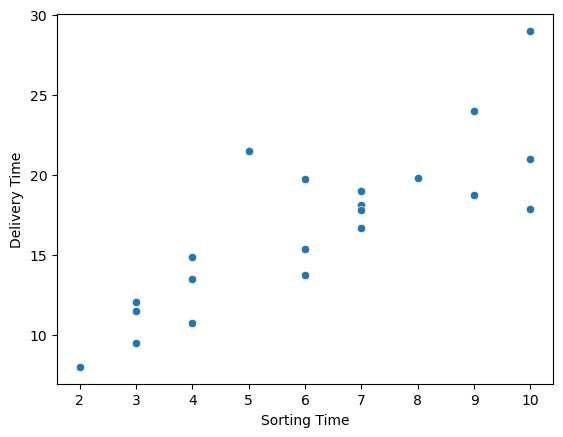

In [9]:
sns.scatterplot(x=data['Sorting Time'],y=data['Delivery Time'],data=data,palette='set3')

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

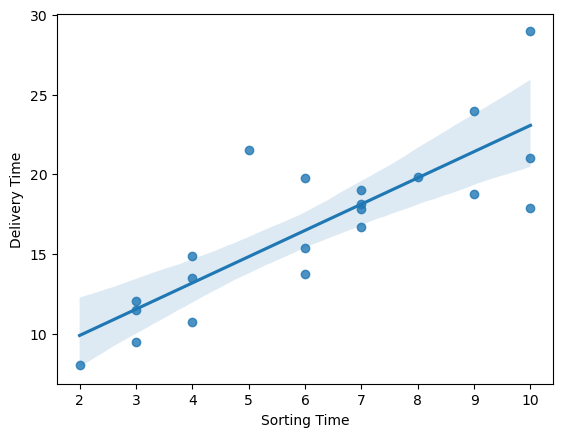

In [10]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

C:\Users\CSC\AppData\Local\Temp\ipykernel_15164\3796684220.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


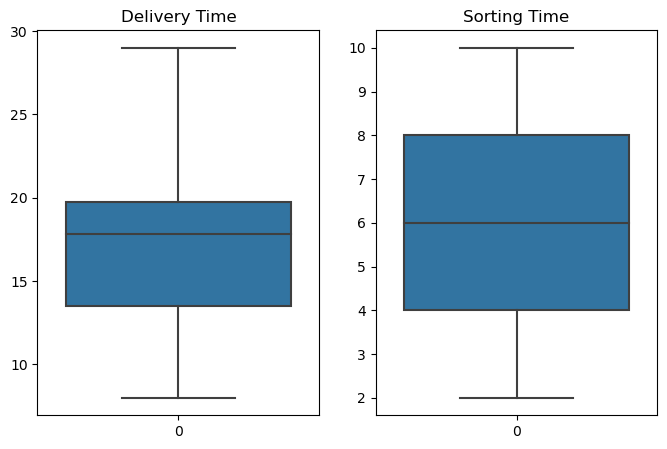

In [11]:
plt.subplots(figsize=(8,5))
plt.subplot(121)
sns.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
sns.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

<Axes: >

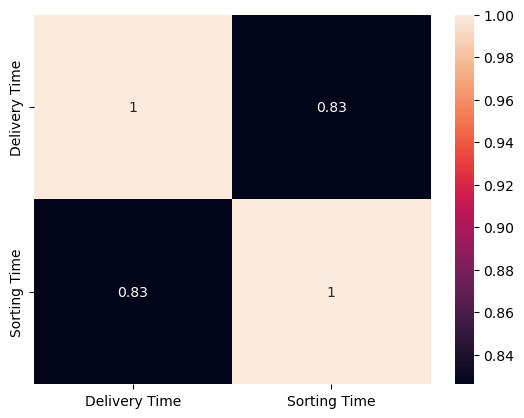

In [12]:
sns.heatmap(data.corr(),annot=True)

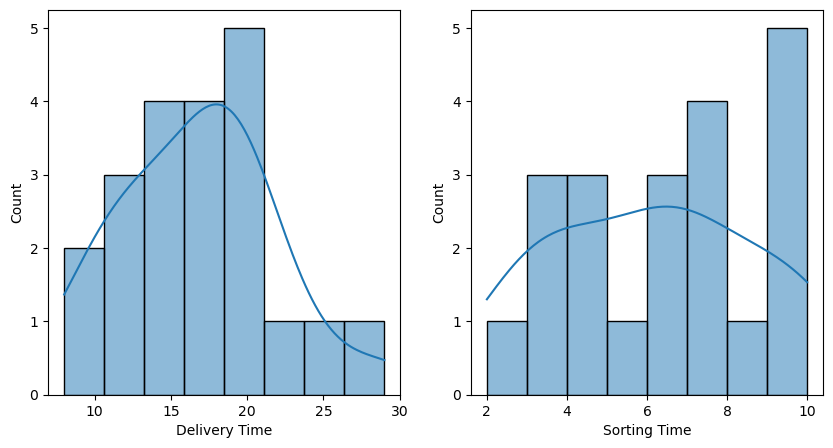

In [13]:
#let's plot the distribution of Data
fig , ax = plt.subplots(figsize=(10,5),ncols=2)
sns.histplot(data['Delivery Time'],kde=True,bins=8,ax=ax[0])
sns.histplot(data['Sorting Time'],kde=True,bins=8,ax=ax[1])
plt.show()

<b>It has a slight right skew. Lets take log of it.

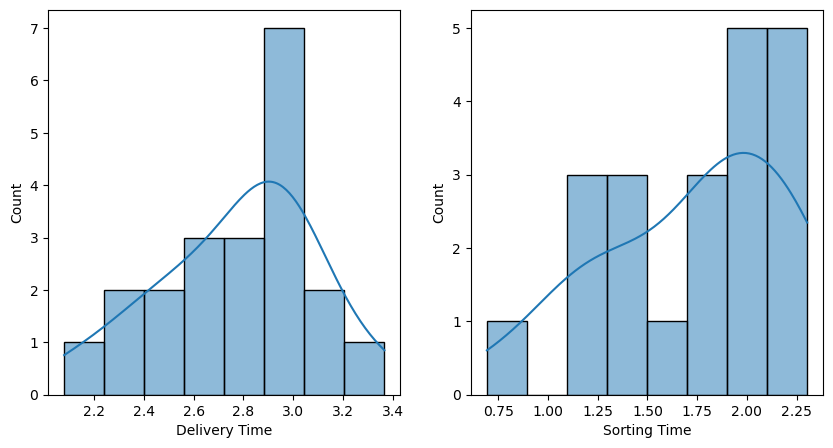

In [14]:
#let's plot the distribution of log od data
fig , ax = plt.subplots(figsize=(10,5),ncols=2)
sns.histplot(np.log(data['Delivery Time']),kde=True,bins=8,ax=ax[0])
sns.histplot(np.log(data['Sorting Time']),kde=True,bins=8,ax=ax[1])
plt.show()

<b>We can see the data is now normally disributed

<b>X and Y 

In [15]:
x = data["Sorting Time"]

In [16]:
y = data["Delivery Time"]

<b>DATA TRANSFORMATION

In [17]:
x_scaled = np.log(x)
x

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [18]:
x2 = sm.add_constant(x_scaled)

In [19]:
model = sm.OLS(y,x2).fit()

In [20]:
model.params

const           1.159684
Sorting Time    9.043413
dtype: float64

In [21]:
model.tvalues

const           0.472460
Sorting Time    6.586789
dtype: float64

In [22]:
model.pvalues

const           0.641980
Sorting Time    0.000003
dtype: float64

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        03:33:46   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1597      2.455      0.472      0.642      -3.978       6.297
Sorting Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PREDICTIONS

In [24]:
newdata = pd.Series([18,24])

In [25]:
data_pred = pd.DataFrame(newdata,columns=['Sorting Time'])
data_pred

,Sorting Time
0,18
1,24


In [26]:
data_pred = sm.add_constant(data_pred)

In [27]:
model.predict(data_pred)

0    163.941126
1    218.201607
dtype: float64

<b>Therefore the Regression Equation is <br>
Delivery time = 1.1597+ (9.0434*Sorting time)

--------------------------------------------------------------------------------------------------------------------------------------

<b> 2) Salary_hike -> Build a prediction model for Salary_hike

In [28]:
data_2 = pd.read_csv(r'D:\Excelr Data Science assignment\Simple Linear Regression\Salary_Data.csv')

In [29]:
data_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
data_2.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [31]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [32]:
data_2.shape

(30, 2)

In [33]:
data_2.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


EDA

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


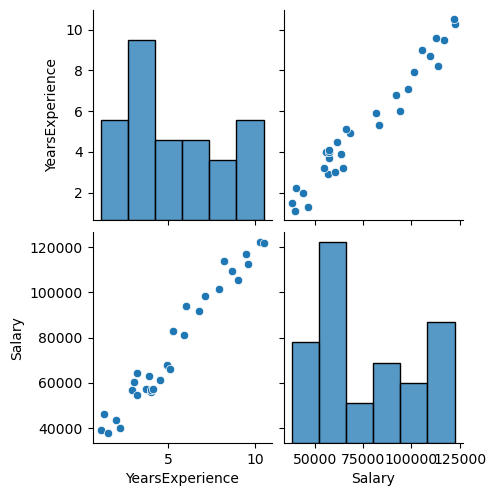

In [34]:
sns.pairplot(data_2)

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


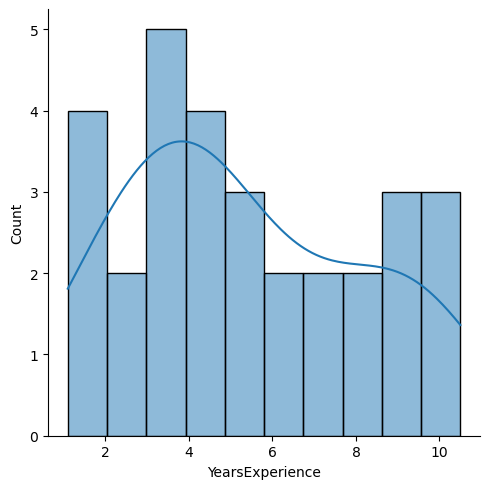

In [35]:
sns.displot(data_2["YearsExperience"],bins=10,kde=True)

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


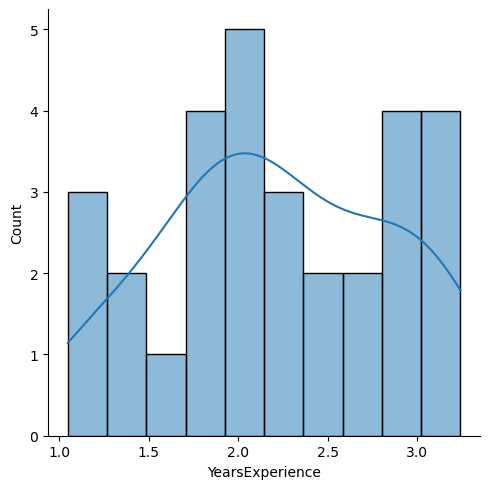

In [36]:
#let take SQRT of above plot and see
sns.displot(np.sqrt(data_2["YearsExperience"]),bins=10,kde=True)

<b> NOw the data is more Normally Distributed

D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


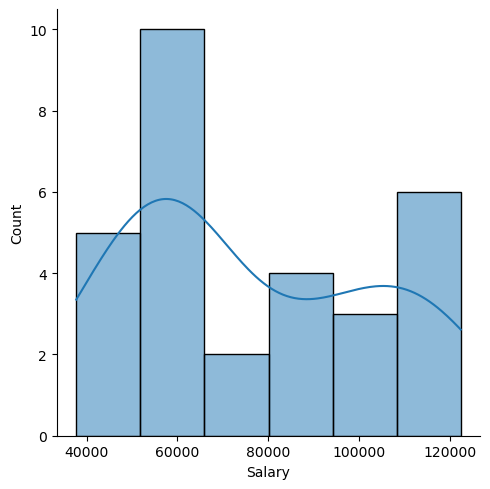

In [37]:
sns.displot(data_2["Salary"],kde=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

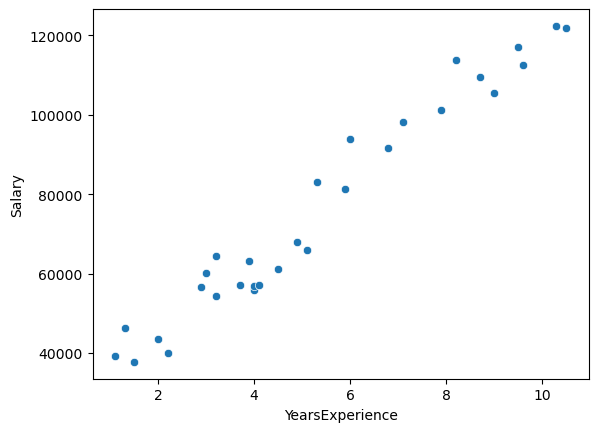

In [38]:
sns.scatterplot(x=data_2['YearsExperience'],y=data_2['Salary'],data=data_2)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

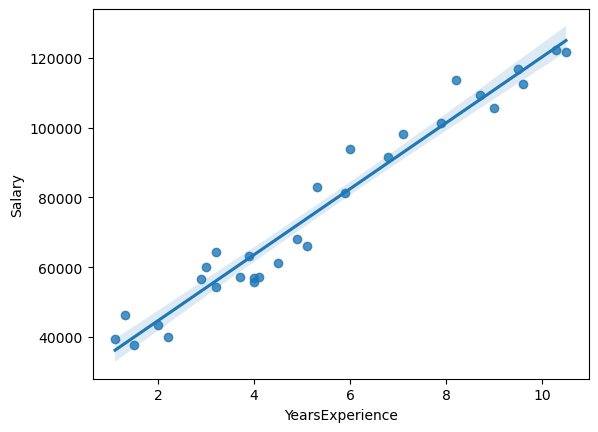

In [39]:
sns.regplot(x=data_2['YearsExperience'],y=data_2['Salary'])

<Axes: >

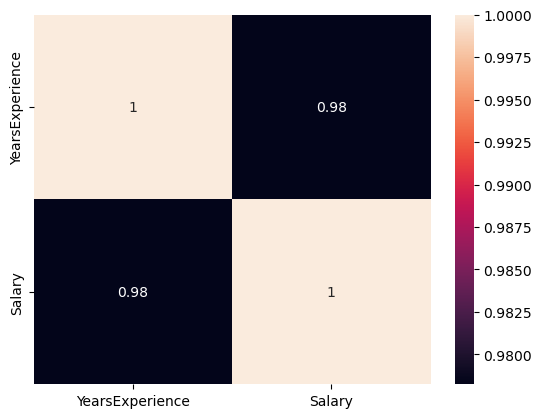

In [40]:
sns.heatmap(data_2.corr(),annot=True)

<b>DATA TRANSFORMATION

In [41]:
X = data_2['YearsExperience']
Y = data_2['Salary']

In [42]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [43]:
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [44]:
X = sm.add_constant(X)

In [45]:
model_2 = sm.OLS(Y,X).fit()

In [46]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        03:33:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
newdata_2 = pd.Series([30.5,12.5])

In [48]:
data_pred_2 = pd.DataFrame(newdata_2,columns=['YearsExperience'])

In [49]:
data_pred_2 = sm.add_constant(data_pred_2)

In [50]:
model_2.predict(data_pred_2)

0    314016.051003
1    143916.729217
dtype: float64

<b>Therefore the Regression Equation is <br>
Salary = 2579 + (9449.96*Years of Experience)